In [1]:
%env BACK_END=tensorflow

env: BACK_END=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [5]:
# plt.imshow(x_train0[5],cmap='Greys')

In [6]:
from keras.utils import np_utils

In [7]:
y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

In [8]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
x_train = x_train0/255
x_test = x_test0/255

In [10]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
from keras.layers import Dense,Activation,Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras import optimizers

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(4,(4,4),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [14]:
model.add(Conv2D(8,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [15]:
model.add(Conv2D(16,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))

In [17]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         68        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2064      
__________

# 動態更改learning rate

In [19]:
from keras.callbacks import ReduceLROnPlateau

In [20]:
lrfunc = ReduceLROnPlateau(monitor="val_acc",patience=3,factor=0.02,min_lr=0.000001)

In [21]:
type(lrfunc)

keras.callbacks.ReduceLROnPlateau

In [22]:
model.compile(optimizer=optimizers.Adam(lr = 0.001), loss='mse', metrics=['accuracy'])

In [23]:
train_history = model.fit(x_train,y_train,batch_size=1000,epochs=50,
                          validation_data=(x_test,y_test),
                          callbacks=[lrfunc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0717 - acc: 0.4374 - val_loss: 0.0329 - val_acc: 0.7848
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0206 - acc: 0.8620 - val_loss: 0.0138 - val_acc: 0.9087
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0125 - acc: 0.9181 - val_loss: 0.0099 - val_acc: 0.9348
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0099 - acc: 0.9356 - val_loss: 0.0082 - val_acc: 0.9447
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0083 - acc: 0.9463 - val_loss: 0.0071 - val_acc: 0.9531
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0073 - acc: 0.9530 - val_loss: 0.0068 - val_acc: 0.9572
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0065 - acc: 0.9576 - val_loss: 0.0059 - val_acc

In [24]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 47us/step


[0.0027963683929355452, 0.9813]

In [25]:
train_history.params.copy()

{'batch_size': 1000,
 'epochs': 50,
 'steps': None,
 'samples': 60000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [26]:
train_history.params.get('metrics')

['loss', 'acc', 'val_loss', 'val_acc']

In [27]:
train_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [28]:
def show_train_history(train_history, label1, label2):
    plt.plot(train_history.epoch,train_history.history[f'{label1}'],label=f'{label1}')
    plt.plot(train_history.epoch,train_history.history[f'{label2}'],label=f'{label2}')
    plt.legend(loc = 'best')    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training history')

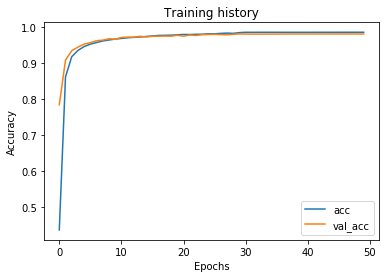

In [29]:
show_train_history(train_history,'acc','val_acc')

In [30]:
predict = model.predict(x_test)

In [70]:
predict.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
np.amax(predict,axis=1)

array([0.99991584, 0.99999857, 0.9865356 , ..., 0.99999857, 0.99912363,
       0.99999535], dtype=float32)

In [72]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix

In [77]:
cm = confusion_matrix(y_test.argmax(axis=1),predict.argmax(axis=1))
cm

array([[ 971,    0,    0,    0,    0,    2,    3,    0,    3,    1],
       [   0, 1123,    3,    1,    0,    2,    1,    2,    3,    0],
       [   2,    2, 1017,    4,    1,    0,    1,    2,    3,    0],
       [   0,    0,    3,  991,    0,    6,    0,    4,    3,    3],
       [   3,    0,    0,    0,  966,    0,    2,    3,    1,    7],
       [   4,    0,    0,    6,    1,  875,    3,    1,    1,    1],
       [   4,    3,    2,    0,    3,    5,  938,    0,    3,    0],
       [   2,    3,    7,    3,    0,    0,    0, 1008,    1,    4],
       [   6,    1,    1,    3,    1,    7,    0,    4,  950,    1],
       [   2,    4,    2,    6,    5,    3,    0,    6,    7,  974]],
      dtype=int64)

In [167]:
def plot_confusion_matrix(confusion_matrix,title):
    plt.figure()
    plt.imshow(cm)
    plt.colorbar()
    plt.ylabel("True")
    plt.xlabel("Predict")
    x=cm.shape[1]
    y=cm.shape[0]
    plt.xlim(-0.5,-0.5+x)
    plt.ylim(-0.5+y,-0.5)
    plt.xticks(np.arange(0,x,1))
    plt.yticks(np.arange(x-1,-1,-1))
    plt.tight_layout()
    plt.title(f'{title}')

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(i,j,cm[j][i],horizontalalignment = 'center',color = 'red',fontsize=9)

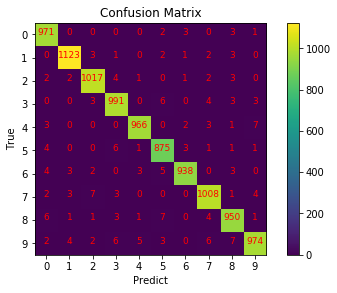

In [168]:
plot_confusion_matrix(cm,'Confusion Matrix')

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_Train,x_Val,y_Train,y_Val = train_test_split(x_train,y_train,test_size=0.2)

In [176]:
from keras.preprocessing.image import ImageDataGenerator

In [177]:
gen = ImageDataGenerator(rotation_range=30,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.3,
                        zoom_range=0.1,
                        data_format = 'channels_last')

In [178]:
gen.fit(x_Train)

In [180]:
test_gen = gen.flow(x_Train,y_Train,batch_size=300)

In [184]:
train_history2=model.fit_generator(test_gen,epochs=30,verbose=1,
                                   steps_per_epoch=300,
                                   validation_data=(x_Val,y_Val),
                                   callbacks = [lrfunc])

Epoch 1/30
300/300 [==============================] - 13s 45ms/step - loss: 0.0292 - acc: 0.8103 - val_loss: 0.0023 - val_acc: 0.9859
Epoch 2/30
300/300 [==============================] - 14s 48ms/step - loss: 0.0279 - acc: 0.8184 - val_loss: 0.0023 - val_acc: 0.9858
Epoch 3/30
300/300 [==============================] - 14s 46ms/step - loss: 0.0288 - acc: 0.8122 - val_loss: 0.0024 - val_acc: 0.9855
Epoch 4/30
300/300 [==============================] - 14s 46ms/step - loss: 0.0287 - acc: 0.8134 - val_loss: 0.0024 - val_acc: 0.9853
Epoch 5/30
300/300 [==============================] - 14s 46ms/step - loss: 0.0278 - acc: 0.8192 - val_loss: 0.0024 - val_acc: 0.9848
Epoch 6/30
300/300 [==============================] - 14s 46ms/step - loss: 0.0280 - acc: 0.8169 - val_loss: 0.0024 - val_acc: 0.9849
Epoch 7/30
300/300 [==============================] - 14s 46ms/step - loss: 0.0279 - acc: 0.8173 - val_loss: 0.0024 - val_acc: 0.9848
Epoch 8/30
300/300 [==============================] - 14s 46ms

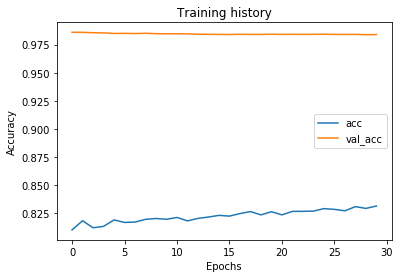

In [185]:
show_train_history(train_history2,'acc','val_acc')